# WG Projected Tmax

Look at the projected $T_{max}$ to see how it evolves over climate projection periods.

In [1]:
%matplotlib inline

In [2]:
import os
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as sstats
import datetime as dt
import sqlalchemy
import seaborn as sns

Parameters

In [3]:
# all months for prism
WG_IN_DIR = r'C:\Temp\WG_Test_Out\Final\Processed'
OUT_DIR = r'C:\Temp\WG_Test_Out\Final\Processed'
OUT_ROOT = "DC_WGMN4"
H0_DATA_XLSX = "%s_H0Data_TMax.xlsx" % OUT_ROOT
H1_PROJ1_XLSX = "%s_H1CProj1_TMax.xlsx" % OUT_ROOT
H1_PROJ2_XLSX = "%s_H1CProj2_TMax.xlsx" % OUT_ROOT
H1_PROJ3_XLSX = "%s_H1CProj3_TMax.xlsx" % OUT_ROOT
DAY_YR = "DayYear_Stats"
SIM_DAYS = "Daily_Stats"
PLOT_DIR = "Plots_ProjComp"

Get our initial indexes and so forth

In [4]:
OurQs = np.array( [ round( 0.05 * x, 2 ) for x in range(21) ], dtype=np.float32 )
NumQs = len( OurQs )
NumQs

21

In [5]:
StatsHdsList = list()
for iI in range(NumQs):
    cQ = OurQs[iI]
    Hdr = "%d_ptile" % round(cQ * 100.0)
    StatsHdsList.append( Hdr )
# end of for
StatsHdsList.append( "Average" )
StatsHdsList.append( "Variance" )
StatsHdsList.append( "Skew" )
StatsHdsList.append( "Kurt" )

In [6]:
DayYrList = [x for x in range(1, 367, 1)]
DayYrIndex = np.array( DayYrList, dtype=np.int32 )

Now load the simulation results

In [7]:
IN_XLSX = os.path.normpath( os.path.join( WG_IN_DIR, H0_DATA_XLSX ) )
SimH1Data = pd.read_excel( IN_XLSX, sheet_name=DAY_YR, header=0, index_col=0 )

In [8]:
display( HTML( SimH1Data.head().to_html() ) )

,0_ptile,5_ptile,10_ptile,15_ptile,20_ptile,25_ptile,30_ptile,35_ptile,40_ptile,45_ptile,50_ptile,55_ptile,60_ptile,65_ptile,70_ptile,75_ptile,80_ptile,85_ptile,90_ptile,95_ptile,100_ptile,Average,Variance,Skew,Kurt
1,-10.268376,-0.113728,2.742485,4.679821,6.208668,7.512201,8.696443,9.771842,10.807323,11.802902,12.782940,13.781673,14.778994,15.806273,16.885284,18.064297,19.366667,20.906908,22.829842,25.695133,38.921234,12.792747,60.978180,0.006325,-0.087486
2,-10.300507,-0.118916,2.669088,4.577512,6.114398,7.425786,8.598435,9.689987,10.729423,11.730433,12.706604,13.688638,14.688041,15.724788,16.811140,17.984951,19.292576,20.834265,22.777723,25.663141,38.969025,12.718971,61.061523,0.017244,-0.088726
3,-10.327695,-0.209815,2.622948,4.510626,6.036545,7.346157,8.510635,9.596886,10.627629,11.632524,12.626524,13.605678,14.613190,15.638262,16.732428,17.909769,19.221384,20.767111,22.719746,25.625137,39.018009,12.649329,61.219940,0.027622,-0.082641
4,-10.349759,-0.248533,2.587509,4.474628,5.989679,7.298026,8.463401,9.550798,10.572497,11.576774,12.563906,13.552629,14.559046,15.596534,16.697643,17.868649,19.190674,20.730803,22.671019,25.599319,39.068123,12.604431,61.155762,0.029447,-0.084885
5,-10.366528,-0.282413,2.499430,4.429140,5.958936,7.257761,8.434763,9.527908,10.571069,11.568981,12.552670,13.541079,14.537642,15.586396,16.686546,17.860596,19.157164,20.694235,22.663424,25.590235,39.119347,12.581042,61.334560,0.029160,-0.090084


In [9]:
for iI in range(len(StatsHdsList)):
    print("%d : %s" % (iI, StatsHdsList[iI]))
# end for

0 : 0_ptile
1 : 5_ptile
2 : 10_ptile
3 : 15_ptile
4 : 20_ptile
5 : 25_ptile
6 : 30_ptile
7 : 35_ptile
8 : 40_ptile
9 : 45_ptile
10 : 50_ptile
11 : 55_ptile
12 : 60_ptile
13 : 65_ptile
14 : 70_ptile
15 : 75_ptile
16 : 80_ptile
17 : 85_ptile
18 : 90_ptile
19 : 95_ptile
20 : 100_ptile
21 : Average
22 : Variance
23 : Skew
24 : Kurt


In [10]:
display( HTML( SimH1Data.describe().to_html() ) )

,0_ptile,5_ptile,10_ptile,15_ptile,20_ptile,25_ptile,30_ptile,35_ptile,40_ptile,45_ptile,50_ptile,55_ptile,60_ptile,65_ptile,70_ptile,75_ptile,80_ptile,85_ptile,90_ptile,95_ptile,100_ptile,Average,Variance,Skew,Kurt
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,6.197180,14.355476,16.597285,18.111419,19.313862,20.341714,21.262929,22.112774,22.916464,23.691683,24.451277,25.208662,25.975633,26.765716,27.596044,28.488239,29.479490,30.633015,32.081419,34.224607,42.831630,24.390542,38.737967,-0.053593,-0.088569
std,11.830393,9.921169,9.384641,9.022153,8.734130,8.485398,8.261620,8.052791,7.853394,7.659034,7.466834,7.272951,7.075521,6.869603,6.650887,6.415014,6.150931,5.840899,5.451399,4.877114,2.242461,7.429178,18.591525,0.063862,0.030049
min,-10.383518,-0.312463,2.499430,4.424436,5.939937,7.256498,8.424415,9.512383,10.539785,11.539582,12.539361,13.531051,14.532744,15.573462,16.674988,17.852346,19.157164,20.694235,22.663424,25.552071,38.230194,12.579239,14.410172,-0.191333,-0.140406
25%,-5.540537,4.682931,7.462678,9.411990,10.950177,12.236828,13.381181,14.434721,15.448665,16.413591,17.383567,18.342698,19.313919,20.318897,21.379827,22.514060,23.786244,25.274402,27.134720,29.849097,41.208330,17.368835,17.080932,-0.099075,-0.110050
50%,5.262082,14.227203,16.666801,18.317907,19.624510,20.736718,21.735871,22.659362,23.531274,24.353345,25.166598,25.966191,26.785019,27.618930,28.528762,29.476662,30.516516,31.758414,33.287193,35.569984,43.827971,25.052984,41.614590,-0.046287,-0.099932
75%,19.791683,25.372105,26.869009,27.889621,28.684464,29.352493,29.973776,30.554705,31.073810,31.578312,32.081116,32.601401,33.106435,33.625126,34.176477,34.787521,35.453604,36.211765,37.189226,38.611239,44.591168,32.074940,58.391195,-0.000013,-0.069987
max,21.169674,26.918392,28.500540,29.584511,30.429420,31.161413,31.803083,32.399231,32.953091,33.474438,33.972427,34.472370,34.965569,35.478371,36.006680,36.566406,37.185009,37.911339,38.812893,40.164322,45.414478,33.789150,62.062012,0.047070,-0.000629


In [11]:
IN_XLSX = os.path.normpath( os.path.join( WG_IN_DIR, H1_PROJ1_XLSX ) )
SimH1P1 = pd.read_excel( IN_XLSX, sheet_name=DAY_YR, header=0, index_col=0 )

In [12]:
display( HTML( SimH1P1.describe().to_html() ) )

,0_ptile,5_ptile,10_ptile,15_ptile,20_ptile,25_ptile,30_ptile,35_ptile,40_ptile,45_ptile,50_ptile,55_ptile,60_ptile,65_ptile,70_ptile,75_ptile,80_ptile,85_ptile,90_ptile,95_ptile,100_ptile,Average,Variance,Skew,Kurt
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,8.880421,18.801538,20.880636,22.263677,23.354181,24.284570,25.116769,25.884916,26.611160,27.312935,28.002537,28.691127,29.389057,30.109840,30.867968,31.685384,32.594543,33.652617,34.982094,36.948268,44.458645,27.956090,32.565811,-0.077407,0.013584
std,11.385504,9.322953,8.826082,8.477141,8.194416,7.948535,7.726338,7.519458,7.322703,7.132058,6.943715,6.755515,6.564966,6.367641,6.160238,5.937376,5.690118,5.403704,5.047003,4.528107,2.940585,6.923992,16.791026,0.095138,0.189837
min,-7.042245,5.120751,7.874661,9.709392,11.166183,12.396104,13.528847,14.557168,15.522243,16.453074,17.363611,18.287708,19.209841,20.161068,21.171654,22.266628,23.477901,24.884933,26.630213,29.190460,38.123611,17.353533,11.405603,-0.350150,-0.115840
25%,-3.423610,9.300440,11.991498,13.753135,15.119342,16.344576,17.375362,18.409031,19.300396,20.242484,21.111867,22.039414,22.936022,23.889687,24.870721,25.907825,27.087920,28.480000,30.175553,32.733517,42.642711,21.084930,15.985198,-0.067405,-0.097260
50%,10.275878,19.670288,21.714536,23.076303,24.165375,25.096908,25.932530,26.704535,27.438956,28.144552,28.837534,29.548242,30.270634,30.997042,31.762613,32.599480,33.546970,34.607433,35.989912,37.991640,45.613516,28.816779,30.251795,-0.037991,-0.066218
75%,21.053169,28.123972,29.619079,30.642508,31.434860,32.106468,32.706387,33.265004,33.797849,34.302158,34.798686,35.305651,35.812624,36.336744,36.876637,37.457446,38.113477,38.889936,39.846109,41.250151,46.606638,34.762079,48.351277,-0.019101,0.007169
max,22.366325,31.172270,32.671329,33.596233,34.292278,34.873398,35.383732,35.847511,36.278702,36.690308,37.097710,37.499367,37.902729,38.321198,38.763264,39.240341,39.770676,40.389816,41.164883,42.344028,48.030998,36.952095,59.887054,0.001522,0.610295


In [13]:
IN_XLSX = os.path.normpath( os.path.join( WG_IN_DIR, H1_PROJ2_XLSX ) )
SimH1P2 = pd.read_excel( IN_XLSX, sheet_name=DAY_YR, header=0, index_col=0 )

In [14]:
display( HTML( SimH1P2.describe().to_html() ) )

,0_ptile,5_ptile,10_ptile,15_ptile,20_ptile,25_ptile,30_ptile,35_ptile,40_ptile,45_ptile,50_ptile,55_ptile,60_ptile,65_ptile,70_ptile,75_ptile,80_ptile,85_ptile,90_ptile,95_ptile,100_ptile,Average,Variance,Skew,Kurt
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,9.918662,19.869034,21.970171,23.369526,24.474314,25.416233,26.258699,27.037587,27.774011,28.484887,29.183354,29.880698,30.588062,31.318471,32.087332,32.915443,33.836276,34.908943,36.257627,38.252426,45.778404,29.138106,33.166372,-0.074126,0.005953
std,11.170013,9.305013,8.836793,8.505269,8.235158,8.000554,7.788108,7.589538,7.400787,7.218087,7.037610,6.856455,6.672790,6.483113,6.284226,6.069101,5.831486,5.554547,5.208645,4.705139,3.168547,7.014397,16.252492,0.094592,0.184497
min,-6.068413,6.117758,8.862638,10.686590,12.139982,13.381889,14.510853,15.539996,16.515938,17.461475,18.399925,19.312719,20.245609,21.205505,22.223185,23.318769,24.514091,25.894918,27.637873,30.185286,39.168545,18.360939,12.577745,-0.341711,-0.115775
25%,-1.984232,10.447094,13.089922,14.827662,16.237443,17.416072,18.495687,19.483550,20.437258,21.318587,22.236874,23.085298,24.023191,24.960391,25.949509,27.018250,28.178613,29.561433,31.325125,33.889530,43.742085,22.186757,16.848476,-0.060823,-0.098052
50%,11.315281,20.744556,22.823491,24.200754,25.321926,26.275040,27.120347,27.908122,28.657009,29.376613,30.076181,30.784571,31.521697,32.270794,33.048317,33.885380,34.841269,35.945223,37.309408,39.367268,46.844017,30.057273,31.484067,-0.033727,-0.077249
75%,21.964456,29.267569,30.800091,31.813724,32.613913,33.309854,33.944280,34.515820,35.039810,35.553835,36.079984,36.598743,37.102777,37.625167,38.209138,38.809226,39.488908,40.264161,41.251527,42.681185,48.282740,36.044380,47.634853,-0.016130,-0.008840
max,23.165201,32.066574,33.661694,34.630451,35.369049,35.987343,36.521225,37.015156,37.471119,37.912807,38.346729,38.771214,39.205044,39.650398,40.112030,40.618843,41.181709,41.842186,42.680710,43.941250,49.753574,38.193848,60.082100,-0.006664,0.597658


In [15]:
IN_XLSX = os.path.normpath( os.path.join( WG_IN_DIR, H1_PROJ3_XLSX ) )
SimH1P3 = pd.read_excel( IN_XLSX, sheet_name=DAY_YR, header=0, index_col=0 )

In [16]:
display( HTML( SimH1P3.describe().to_html() ) )

,0_ptile,5_ptile,10_ptile,15_ptile,20_ptile,25_ptile,30_ptile,35_ptile,40_ptile,45_ptile,50_ptile,55_ptile,60_ptile,65_ptile,70_ptile,75_ptile,80_ptile,85_ptile,90_ptile,95_ptile,100_ptile,Average,Variance,Skew,Kurt
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,10.260279,20.562820,22.761482,24.229072,25.387164,26.376476,27.261181,28.079330,28.853210,29.600111,30.334354,31.067062,31.810297,32.578625,33.386738,34.258648,35.227775,36.354361,37.771463,39.867668,47.603050,30.290607,36.060339,-0.063972,-0.021737
std,10.937137,9.186237,8.745990,8.436963,8.187735,7.971195,7.774485,7.590929,7.415905,7.247052,7.080190,6.913529,6.743645,6.567521,6.382943,6.182976,5.961482,5.705428,5.385222,4.916571,3.401201,7.058103,15.963763,0.076056,0.131205
min,-5.672039,6.729902,9.532696,11.415015,12.893094,14.175095,15.319593,16.382225,17.366728,18.318056,19.270536,20.208820,21.163328,22.163595,23.192070,24.318010,25.565582,27.003099,28.815767,31.453594,40.683479,19.257601,15.523593,-0.281869,-0.112459
25%,-1.382093,11.284490,14.024400,15.794539,17.214992,18.445378,19.522702,20.564415,21.544268,22.440902,23.397016,24.293769,25.214801,26.147316,27.187562,28.248236,29.492544,30.919530,32.699563,35.346775,45.246084,23.368880,20.562136,-0.059713,-0.098360
50%,12.110077,21.667649,23.828279,25.285830,26.440459,27.440119,28.325943,29.141629,29.921424,30.664464,31.407146,32.144436,32.901903,33.671482,34.487032,35.368267,36.364012,37.499722,38.958569,41.091513,48.725397,31.380288,34.063070,-0.033703,-0.081843
75%,21.812707,29.719636,31.405499,32.533527,33.435485,34.181087,34.862123,35.497404,36.079614,36.640810,37.218603,37.766522,38.341717,38.931714,39.554169,40.223420,40.948910,41.779701,42.843536,44.399657,50.481040,37.172238,50.977480,-0.015552,-0.022712
max,22.916119,32.502644,34.182198,35.244843,36.054615,36.744019,37.356899,37.910526,38.433327,38.936424,39.429874,39.925011,40.421764,40.938046,41.482384,42.069378,42.718166,43.499737,44.475708,45.926834,51.571144,39.303329,61.948467,-0.001840,0.394501


Medians

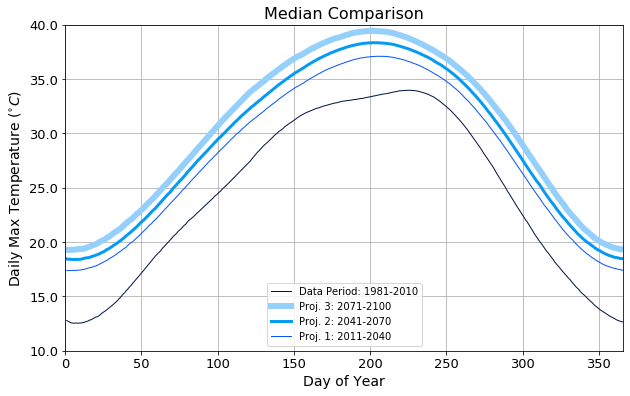

In [17]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( SimH1Data.index, SimH1Data[StatsHdsList[10]], color="xkcd:navy", 
           linestyle="-", linewidth=1, label="Data Period: 1981-2010")
ax11.plot( SimH1P3.index, SimH1P3[StatsHdsList[10]], color="xkcd:light blue", linestyle="-", 
           linewidth=6, label="Proj. 3: 2071-2100")
ax11.plot( SimH1P2.index, SimH1P2[StatsHdsList[10]], color="xkcd:azure", 
           linestyle="-", linewidth=3, label="Proj. 2: 2041-2070")
ax11.plot( SimH1P1.index, SimH1P1[StatsHdsList[10]], color="xkcd:electric blue", 
           linestyle="-", linewidth=1, label="Proj. 1: 2011-2040")
#ax11.fill_between( SimH0.index, SimH0[StatsHdsList[5]], SimH0[StatsHdsList[15]],
#                   color='xkcd:greyish blue', alpha=0.5 )
ax11.set_title("Median Comparison", fontsize=16)
ax11.set_xlabel('Day of Year', fontsize=14 )
ax11.set_ylabel('Daily Max Temperature $( ^{\circ} C)$', fontsize=14)
ax11.set_xlim( (0.0, 366.0) )
ax11.set_ylim( (10.0, 40.0) )
ax11.grid( b=True )
ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Averages

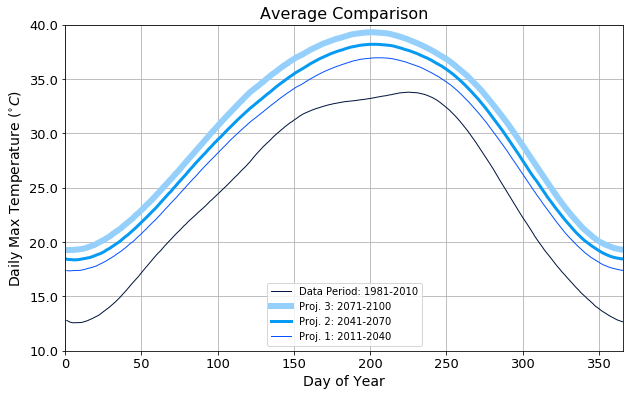

In [18]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( SimH1Data.index, SimH1Data[StatsHdsList[21]], color="xkcd:navy", 
           linestyle="-", linewidth=1, label="Data Period: 1981-2010")
ax11.plot( SimH1P3.index, SimH1P3[StatsHdsList[21]], color="xkcd:light blue", linestyle="-", 
           linewidth=6, label="Proj. 3: 2071-2100")
ax11.plot( SimH1P2.index, SimH1P2[StatsHdsList[21]], color="xkcd:azure", 
           linestyle="-", linewidth=3, label="Proj. 2: 2041-2070")
ax11.plot( SimH1P1.index, SimH1P1[StatsHdsList[21]], color="xkcd:electric blue", 
           linestyle="-", linewidth=1, label="Proj. 1: 2011-2040")
#ax11.fill_between( SimH0.index, SimH0[StatsHdsList[5]], SimH0[StatsHdsList[15]],
#                   color='xkcd:greyish blue', alpha=0.5 )
ax11.set_title("Average Comparison", fontsize=16)
ax11.set_xlabel('Day of Year', fontsize=14 )
ax11.set_ylabel('Daily Max Temperature $( ^{\circ} C)$', fontsize=14)
ax11.set_xlim( (0.0, 366.0) )
ax11.set_ylim( (10.0, 40.0) )
ax11.grid( b=True )
ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [19]:
AveMaxDiffP3tP2 = (SimH1P3[StatsHdsList[21]] - SimH1P2[StatsHdsList[21]]).mean()
AveMaxDiffP3tP1 = (SimH1P3[StatsHdsList[21]] - SimH1P1[StatsHdsList[21]]).mean()
AveMaxDiffP3tData = (SimH1P3[StatsHdsList[21]] - SimH1Data[StatsHdsList[21]]).mean()
AveMaxDiffP3tP2, AveMaxDiffP3tP1, AveMaxDiffP3tData

(1.1525014658443262, 2.3345171714741024, 5.900065476777123)

In [20]:
AveMaxDiffP2tP1 = (SimH1P2[StatsHdsList[21]] - SimH1P1[StatsHdsList[21]]).mean()
AveMaxDiffP2tData = (SimH1P2[StatsHdsList[21]] - SimH1Data[StatsHdsList[21]]).mean()
AveMaxDiffP1tData = (SimH1P1[StatsHdsList[21]] - SimH1Data[StatsHdsList[21]]).mean()
AveMaxDiffP2tP1, AveMaxDiffP2tData, AveMaxDiffP1tData

(1.1820157056297762, 4.7475640109327975, 3.5655483053030212)

Max 

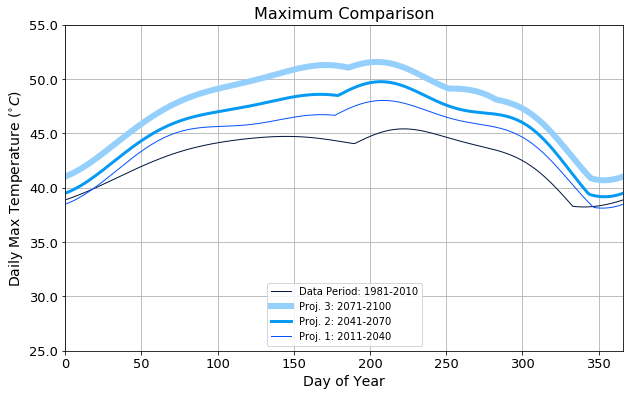

In [21]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( SimH1Data.index, SimH1Data[StatsHdsList[20]], color="xkcd:navy", 
           linestyle="-", linewidth=1, label="Data Period: 1981-2010")
ax11.plot( SimH1P3.index, SimH1P3[StatsHdsList[20]], color="xkcd:light blue", linestyle="-", 
           linewidth=6, label="Proj. 3: 2071-2100")
ax11.plot( SimH1P2.index, SimH1P2[StatsHdsList[20]], color="xkcd:azure", 
           linestyle="-", linewidth=3, label="Proj. 2: 2041-2070")
ax11.plot( SimH1P1.index, SimH1P1[StatsHdsList[20]], color="xkcd:electric blue", 
           linestyle="-", linewidth=1, label="Proj. 1: 2011-2040")
#ax11.fill_between( SimH0.index, SimH0[StatsHdsList[5]], SimH0[StatsHdsList[15]],
#                   color='xkcd:greyish blue', alpha=0.5 )
ax11.set_title("Maximum Comparison", fontsize=16)
ax11.set_xlabel('Day of Year', fontsize=14 )
ax11.set_ylabel('Daily Max Temperature $( ^{\circ} C)$', fontsize=14)
ax11.set_xlim( (0.0, 366.0) )
ax11.set_ylim( (25.0, 55.0) )
ax11.grid( b=True )
ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Min

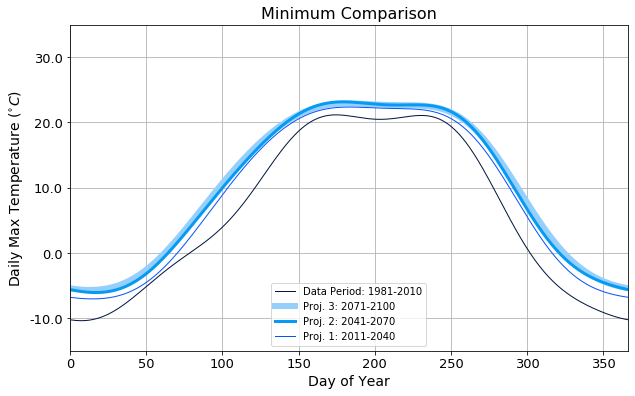

In [22]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( SimH1Data.index, SimH1Data[StatsHdsList[0]], color="xkcd:navy", 
           linestyle="-", linewidth=1, label="Data Period: 1981-2010")
ax11.plot( SimH1P3.index, SimH1P3[StatsHdsList[0]], color="xkcd:light blue", linestyle="-", 
           linewidth=6, label="Proj. 3: 2071-2100")
ax11.plot( SimH1P2.index, SimH1P2[StatsHdsList[0]], color="xkcd:azure", 
           linestyle="-", linewidth=3, label="Proj. 2: 2041-2070")
ax11.plot( SimH1P1.index, SimH1P1[StatsHdsList[0]], color="xkcd:electric blue", 
           linestyle="-", linewidth=1, label="Proj. 1: 2011-2040")
#ax11.fill_between( SimH0.index, SimH0[StatsHdsList[5]], SimH0[StatsHdsList[15]],
#                   color='xkcd:greyish blue', alpha=0.5 )
ax11.set_title("Minimum Comparison", fontsize=16)
ax11.set_xlabel('Day of Year', fontsize=14 )
ax11.set_ylabel('Daily Max Temperature $( ^{\circ} C)$', fontsize=14)
ax11.set_xlim( (0.0, 366.0) )
ax11.set_ylim( (-15.0, 35.0) )
ax11.grid( b=True )
ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )